# "Hypothesis Testing"
> "My reference notebook for the poisson distribution."

- author: Christopher Thiemann
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [statistics, theory, testing]
- hide: false
- search_exclude: true
- image: images/hypothesis_testing.png

#hide
Hello This is a markdown page {% cite signaltrain %}

## The problem

The most common case is that we have given some iid data $X_1,...,X_n$ which comes from some distribution described by unknown parameters $\theta \in \Omega$. The Null hypothesis is then that we say the parameter is equal to some value $\theta_0$ Against the alternative hypothesis that it is not $\theta_0$ (e.g. $\theta = 0$ vs. $\theta \neq 0$). With our sample, we can then check if we can't reject our null hypothesis (don't forget we can never "prove" that the null is correct!). The general idea is then to construct a *test statistic* from our sample $T=T(X_1, ..., X_n)$. Under the null one then derives the distribution of the test statistic. Finally, one can calculate the probability of observing the test statistic or something more extreme. If this is highly unlikely then this is a strong indication that our null hypothesis is wrong. "Highly unlikely" is often quantified as 5 % this is also known as *significance level*. While the probability of observing something more extreme than the test statistic is known as the *p-value*. For example, if the significance level is 5 % and the p-value is 1 % then you would reject the null. Note that there is nothing magical about the significance level of 5 %, as far as I know, it was chosen rather arbitrary by Fisher back in the days. It has become standard practice to report a scientific finding if the p-value is below this magic 5 % mark (probably due to the pressure of the scientist to generate findings) and that this procedure is (seemingly!) easy to understand and to apply. This has lead to some bad scientific practices both knowingly and unknowingly. One example is the problem of *multiple testing*. As the p-value depends on the test statistic which itself depends on the data (which is random) hence the p-value is also influenced by randomness. Hence, it is not unlikely to get a significant result just by chance this is a problem of multiple testing, say you do 100 hypotheses tests than on average 5 of them will be "significant". Nevertheless, the classical hypothesis testing can be summarized as follows 

Given a sample from some known distribution $X_1,...,X_n$ (except the parameters pinning it down):

* State the null hypotheses $\theta = \theta_0$
* Calculate the test statistic with the data $T=T(X_1, ..., X_n)$
* Derive the distribution of the test statistic
* Calculate the p-value
* Decide if you reject the null or that you can't reject that it is false


Not until now, we assumed that we know from which family the data were drawn just now know the parameter with describes the distribution (e.g. wen know the data comes from a poisson distribution with some rate $\lambda$) in practices one often doesn't know the distribution. Often one tried to use the central limit theorem to guarantee at least asymptotic normality then one can use tests on the mean and variance of that asymptotic distribution, this is for example done in regression models

another way is to use sampling strategies such as bootstrapping to simulate the sampling distribution of the mean for example

In [3]:
#hide
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set()

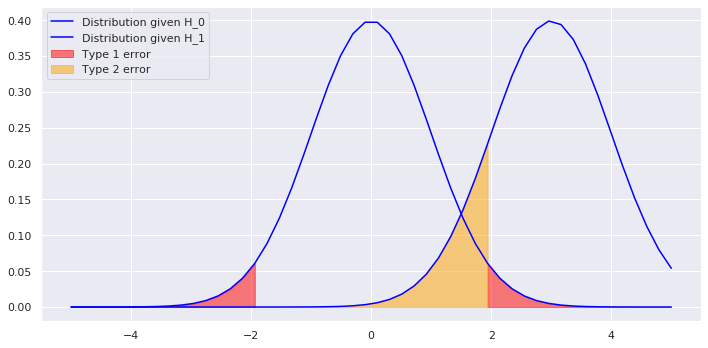

In [64]:
#hide
fig, axes = plt.subplots(tight_layout = True, figsize = (10, 5))

x = np.linspace(-5, 5)
y = norm.pdf(x)
axes.plot(x, y, color = 'blue', label = 'Distribution given H_0')
axes.fill_between(x, y, where = -1.9 > x, alpha = .5, color = 'red', label = 'Type 1 error')
axes.fill_between(x, y, where = x > 1.93, alpha = .5, color = 'red')

y = norm.pdf(x, 3)
axes.plot(x, y, color = 'blue', label = 'Distribution given H_1')
axes.fill_between(x, y, where = x < 1.96, alpha = .5, color = 'orange', label = 'Type 2 error')


plt.legend()

fig.savefig("hypothesis_testing.png");


## Resampling/Bootstraping

## Theory vs simulation

## Power

We can control the error for type one and we can't control it for type 2. **But** we can anlyse/visualize it. 

## p hacking

## Bonferoni correction

## Confidence interval vs. teststatistic

## Example: Gauss Test

### Power Function of the Gauss Test

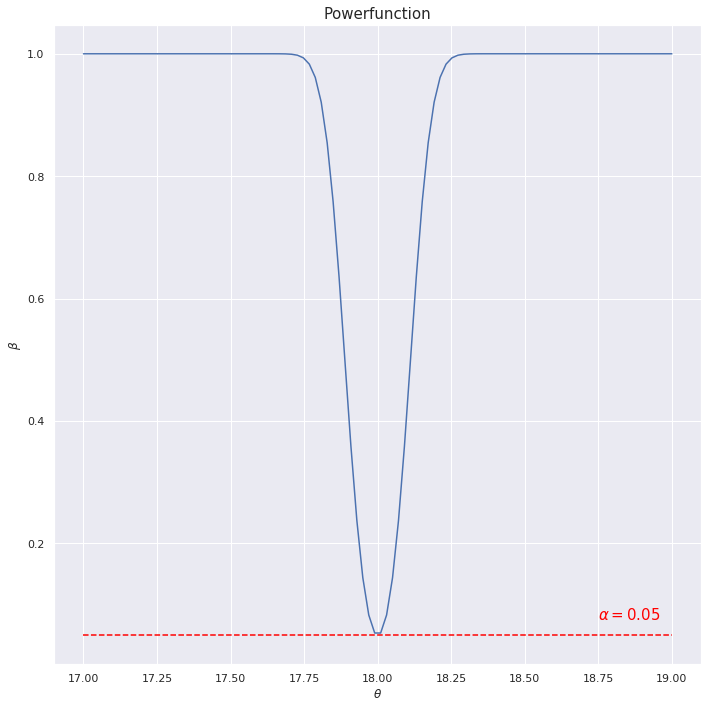

In [4]:
#hide_input
n = 10
sigma = 0.18
mu_0 = 18.3
grid = np.linspace(17, 19 , 100)
alpha = 0.05

aa = power_gauss(alpha, n, sigma, grid, 18)

fig, axes = plt.subplots( tight_layout = True, figsize = (10, 10))

axes.plot(grid, aa)
axes.hlines(alpha, grid.min(), grid.max(), linestyle = 'dashed', color = 'red'  )
axes.annotate(r"$\alpha = 0.05$", [18.75, 0.05], [18.75, .075], fontsize = 15, color = 'red')
axes.set_ylabel(r"$\beta$")
axes.set_xlabel(r"$\theta$")
axes.set_title("Powerfunction", fontsize = 15);


### Simulating the power function

0.01

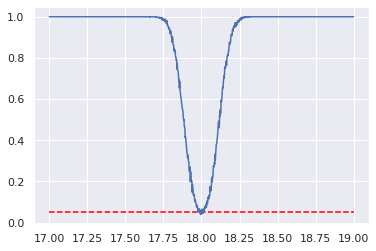

In [85]:
#hide_input
resolution = 1000
#alpha = .05
grid = np.linspace(17, 19 , resolution)

num_sim = 1000
#num_obs = 1000

data = norm.rvs(loc = grid , scale = 0.18 / np.sqrt(9), size = (num_sim, resolution)) # num_sim * num_obs * grid

quantile = norm.ppf(0.975, loc = 18, scale = 0.18 / np.sqrt(9))
quantile2 = norm.ppf(1 - 0.975, loc = 18, scale = 0.18 / np.sqrt(9))
result =  np.where((data > quantile) | (data <  quantile2), 1, 0).mean(axis = 0)

plt.plot(grid , result)
plt.hlines(0.05, grid.min(), grid.max(), linestyle = 'dashed', color = 'red'  ); alpha

## Helper Functions

In [1]:
def power_gauss(alpha, n, sigma, mu, mu_0):
    
    quantile = norm.ppf(1 - alpha / 2)
    
    scaling = np.sqrt(n) * (mu - mu_0) / sigma
    
    return 1 - norm.cdf(quantile -  scaling )+ norm.cdf( - quantile - scaling)



{% bibliography --cited %}

In [73]:
resolution = 300
#alpha = .05
grid = np.linspace(16, 18 , resolution)

num_sim = 200
num_obs = 200
alpha = 0.01
quantile = norm.ppf(1 - alpha / 2, loc = 18.3, scale = 0.18  / np.sqrt(9) )
quantile2 = norm.ppf(1- (1-alpha / 2), loc = 18.3, scale = 0.18  / np.sqrt(9) )

data = norm.rvs(loc = 18.3 ,scale = 0.18 / np.sqrt(9), size = 10000)
    
result = np.where((data > quantile) | (data <  quantile2), 1, 0).mean()
result

0.01

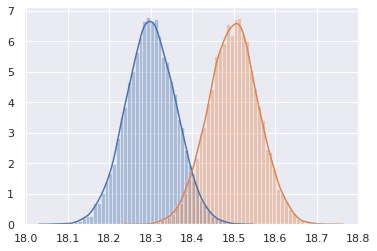

In [53]:
data = norm.rvs(loc = 18.3 ,scale = 0.18   / 3, size = 10000)
data2 = norm.rvs(loc = 18.5 ,scale = 0.18  / 3, size = 10000)

sns.distplot(data)
sns.distplot(data2)